In [31]:
!pip install sqlalchemy psycopg2-binary pandas requests


In [32]:
import requests
import pandas as pd
from sqlalchemy import create_engine


In [33]:
DB_USER = "product_bi_project_user"
DB_PASSWORD = "iuUv5QA5mxAHzAaqRHL543pdjcYIFX9M"
DB_HOST = "dpg-d2c4cf7diees73f98p90-a.frankfurt-postgres.render.com"
DB_PORT = "5432"
DB_NAME = "product_bi_project"

In [34]:
connection_string = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

In [35]:
engine = create_engine(connection_string)

In [36]:
url = "https://fakestoreapi.com/products"
response = requests.get(url)
data = response.json()

In [37]:
df = pd.DataFrame(data)

In [38]:
df

,id,title,price,description,category,image,rating
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,"{'rate': 3.9, 'count': 120}"
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,"{'rate': 4.1, 'count': 259}"
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,"{'rate': 4.7, 'count': 500}"
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,"{'rate': 2.1, 'count': 430}"
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,"{'rate': 4.6, 'count': 400}"
5,6,Solid Gold Petite Micropave,168.00,Satisfaction Guaranteed. Return or exchange an...,jewelery,https://fakestoreapi.com/img/61sbMiUnoGL._AC_U...,"{'rate': 3.9, 'count': 70}"
6,7,White Gold Plated Princess,9.99,Classic Created Wedding Engagement Solitaire D...,jewelery,https://fakestoreapi.com/img/71YAIFU48IL._AC_U...,"{'rate': 3, 'count': 400}"
7,8,Pierced Owl Rose Gold Plated Stainless Steel D...,10.99,Rose Gold Plated Double Flared Tunnel Plug Ear...,jewelery,https://fakestoreapi.com/img/51UDEzMJVpL._AC_U...,"{'rate': 1.9, 'count': 100}"
8,9,WD 2TB Elements Portable External Hard Drive -...,64.00,USB 3.0 and USB 2.0 Compatibility Fast data tr...,electronics,https://fakestoreapi.com/img/61IBBVJvSDL._AC_S...,"{'rate': 3.3, 'count': 203}"
9,10,SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...,109.00,"Easy upgrade for faster boot up, shutdown, app...",electronics,https://fakestoreapi.com/img/61U7T1koQqL._AC_S...,"{'rate': 2.9, 'count': 470}"


In [39]:
df["rating_rate"] = df["rating"].apply(lambda x: x["rate"])
df["rating_count"] = df["rating"]. apply(lambda x: x["count"])

In [40]:
df.drop(columns=["rating"], inplace=True)


In [41]:
df.to_sql("products", engine, if_exists="replace", index=False)

20

In [42]:
df_from_db = pd.read_sql("SELECT * FROM products", engine)


df_from_db.head()

,id,title,price,description,category,image,rating_rate,rating_count
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,3.9,120
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,4.1,259
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,4.7,500
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,2.1,430
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,4.6,400


In [43]:
total_products = pd.read_sql("SELECT COUNT(*) as total FROM products", engine)
print(total_products)

   total
0     20


In [44]:
avg_price = pd.read_sql("""
    SELECT category, AVG(price) as avg_price
    FROM products
    GROUP BY category
""", engine)
print(avg_price)

           category   avg_price
0  women's clothing   26.286667
1    men's clothing   51.057500
2          jewelery  220.995000
3       electronics  332.498333


In [45]:
top_rated = pd.read_sql("""
    SELECT title, rating_rate, rating_count
    FROM products
    ORDER BY rating_rate DESC
    LIMIT 5
""", engine)
print(top_rated)

                                               title  rating_rate  \
0  WD 4TB Gaming Drive Works with Playstation 4 P...          4.8   
1  Silicon Power 256GB SSD 3D NAND A55 SLC Cache ...          4.8   
2                                 Mens Cotton Jacket          4.7   
3        MBJ Women's Solid Short Sleeve Boat Neck V           4.7   
4  John Hardy Women's Legends Naga Gold & Silver ...          4.6   

   rating_count  
0           400  
1           319  
2           500  
3           130  
4           400  


In [46]:
most_reviewed = pd.read_sql("""
    SELECT title, rating_count, rating_rate
    FROM products
    ORDER BY rating_count DESC
    LIMIT 5
""", engine)

most_reviewed

,title,rating_count,rating_rate
0,Rain Jacket Women Windbreaker Striped Climbing...,679,3.8
1,Mens Cotton Jacket,500,4.7
2,SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...,470,2.9
3,Mens Casual Slim Fit,430,2.1
4,John Hardy Women's Legends Naga Gold & Silver ...,400,4.6


In [47]:
columns_info = pd.read_sql("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'products'
""", engine)

columns_info

,column_name,data_type
0,id,bigint
1,price,double precision
2,rating_rate,double precision
3,rating_count,bigint
4,category,text
5,title,text
6,image,text
7,description,text


In [48]:
import pandas as pd
from sqlalchemy import create_engine

# Use your actual Render DB credentials here
DB_USER = "product_bi_project_user"
DB_PASSWORD = "iuUv5QA5mxAHzAaqRHL543pdjcYIFX9M"
DB_HOST = "dpg-d2c4cf7diees73f98p90-a.frankfurt-postgres.render.com"
DB_PORT = "5432"
DB_NAME = "product_bi_project"

connection_string = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = create_engine(connection_string)

# Query products table
df = pd.read_sql("SELECT * FROM products LIMIT 10;", engine)
print(df)

   id                                              title   price  \
0   1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...  109.95   
1   2             Mens Casual Premium Slim Fit T-Shirts    22.30   
2   3                                 Mens Cotton Jacket   55.99   
3   4                               Mens Casual Slim Fit   15.99   
4   5  John Hardy Women's Legends Naga Gold & Silver ...  695.00   
5   6                       Solid Gold Petite Micropave   168.00   
6   7                         White Gold Plated Princess    9.99   
7   8  Pierced Owl Rose Gold Plated Stainless Steel D...   10.99   
8   9  WD 2TB Elements Portable External Hard Drive -...   64.00   
9  10  SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...  109.00   

                                         description        category  \
0  Your perfect pack for everyday use and walks i...  men's clothing   
1  Slim-fitting style, contrast raglan long sleev...  men's clothing   
2  great outerwear jackets for Spri

Actual vs Predicted Prices:


,Actual Price,Predicted Price
0,109.95,71.533156
17,9.85,26.685984
15,29.95,42.019981
1,22.30,47.289999



Predictions saved to 'product_price_predictions' table in the database.


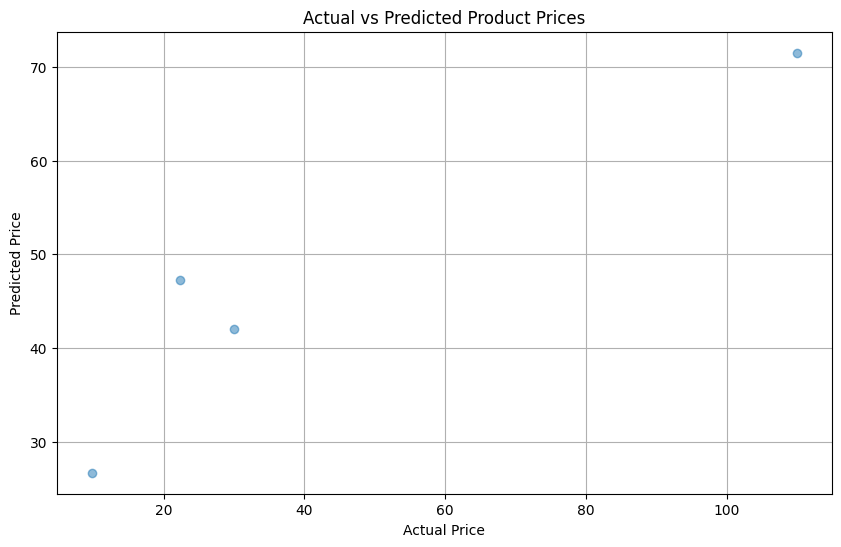

In [54]:
import pandas as pd
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Use your actual Render DB credentials here
DB_USER = "product_bi_project_user"
DB_PASSWORD = "iuUv5QA5mxAHzAaqRHL543pdjcYIFX9M"
DB_HOST = "dpg-d2c4cf7diees73f98p90-a.frankfurt-postgres.render.com"
DB_PORT = "5432"
DB_NAME = "product_bi_project"

connection_string = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = create_engine(connection_string)

# Query products table
df = pd.read_sql("SELECT * FROM products;", engine)

# 1. Prepare the data by encoding categorical variables
# Separate features (X) and target (y)
X = df[['category', 'rating_rate', 'rating_count']]
y = df['price']

# Identify categorical and numerical features
categorical_features = ['category']
numerical_features = ['rating_rate', 'rating_count']

# Create a column transformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough' # Keep numerical features as they are
)

# Create a pipeline that first preprocesses the data and then applies the linear regression model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

# 2. Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Trains a linear regression model to predict product prices
model_pipeline.fit(X_train, y_train)

# Predict prices on the test set
y_pred = model_pipeline.predict(X_test)

# 4. Evaluates the model by showing actual vs predicted prices
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print("Actual vs Predicted Prices:")
display(results_df)

# 5. Saves the predictions back into a PostgreSQL database using SQLAlchemy
# Add the predicted prices to the original test DataFrame for saving
X_test_with_predictions = X_test.copy()
X_test_with_predictions['predicted_price'] = y_pred
X_test_with_predictions = X_test_with_predictions.merge(df[['id', 'category', 'rating_rate', 'rating_count']], on=['category', 'rating_rate', 'rating_count'], how='left')


# Select only the relevant columns for the database table (id and predicted_price)
predictions_to_save = X_test_with_predictions[['id', 'predicted_price']]

# Save predictions to a new table in the database
predictions_to_save.to_sql("product_price_predictions", engine, if_exists="replace", index=False)

print("\nPredictions saved to 'product_price_predictions' table in the database.")


# 6. Visualizes actual vs predicted prices using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Product Prices")
plt.grid(True)
plt.show()

In [58]:
with engine.connect() as connection:
    connection.rollback()  # Rollback any pending transaction
    result_df = pd.read_sql("SELECT * FROM product_price_predictions LIMIT 10;", connection)
    print(result_df)


   id  predicted_price
0   1        71.533156
1  18        26.685984
2  16        42.019981
3   2        47.289999


In [59]:
# Check for missing values in the DataFrame
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


,0
id,0
title,0
price,0
description,0
category,0
image,0
rating_rate,0
rating_count,0
